In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from src.data import io
from src.visualization import visualize

In [14]:
species = "Tomato"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")
base_dir = pathlib.Path.cwd()

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Tomato - train_dir: ../data/processed/Tomato - metadata_file_path: ../data/processed/Tomato/metadata.json


In [8]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: f1d07645-8b59-413f-a4ad-f4919f3b6665


In [12]:
training_log_path = model_dir.joinpath(model_id, "training.log")

with open(training_log_path) as log_file:
    logs = log_file.readlines()
    training_logs = dict([log.strip().split("\t") for log in logs])
    
training_logs

{'relu': 'models/f1d07645-8b59-413f-a4ad-f4919f3b6665/2020-01-27__03_2615',
 'linear': 'models/f1d07645-8b59-413f-a4ad-f4919f3b6665/2020-01-27__03_3443'}

## ReLU

In [16]:
model_metadata_file_path = pathlib.Path("..", training_logs["relu"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [17]:
model_metadata

{'id': 'f1d07645-8b59-413f-a4ad-f4919f3b6665',
 'start_time': '2020-01-27__03_2615',
 'arguments': {'batch_size': 64,
  'epochs': 50,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': True},
 'dataset': {'id': 'f1d07645-8b59-413f-a4ad-f4919f3b6665',
  'species': 'Tomato',
  'num_classes': 10,
  'class_names': ['Tomato___Bacterial_spot',
   'Tomato___Early_blight',
   'Tomato___Late_blight',
   'Tomato___Leaf_Mold',
   'Tomato___Septoria_leaf_spot',
   'Tomato___Spider_mites Two-spotted_spider_mite',
   'Tomato___Target_Spot',
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
   'Tomato___Tomato_mosaic_virus',
   'Tomato___healthy'],
  'created_date': '2020-01-26 22:43:34',
  'file_counts': {'train': 14404, 'test': 1801, 'eval': 1801}},
 'history': {'loss': [1.5424790771802266,
   0.7864200605286492,
   0.5583705332544114,
   0.4368798941373825,
   0.3695608745018641,
   0.3129031108154191,
   0.3166537160343594,
   0.26042947275771033,
   0.22650509365730814,
   0.1961810

In [18]:
history = model_metadata["history"]

In [19]:
metrics_df = visualize.create_metrics_dataframe(history)

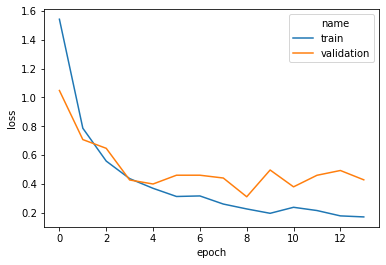

In [20]:
loss_plot = visualize.learning_curves("loss", metrics_df)

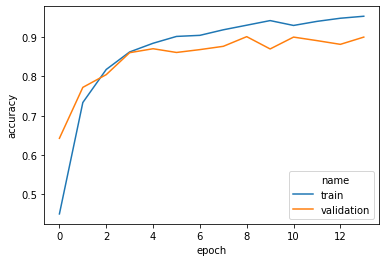

In [21]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [22]:
model_metadata_file_path = pathlib.Path("..", training_logs["linear"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))
model_metadata

{'id': 'f1d07645-8b59-413f-a4ad-f4919f3b6665',
 'start_time': '2020-01-27__03_3443',
 'arguments': {'batch_size': 64,
  'epochs': 50,
  'monitor': 'val_loss',
  'activation': 'linear',
  'early_stopping': True},
 'dataset': {'id': 'f1d07645-8b59-413f-a4ad-f4919f3b6665',
  'species': 'Tomato',
  'num_classes': 10,
  'class_names': ['Tomato___Bacterial_spot',
   'Tomato___Early_blight',
   'Tomato___Late_blight',
   'Tomato___Leaf_Mold',
   'Tomato___Septoria_leaf_spot',
   'Tomato___Spider_mites Two-spotted_spider_mite',
   'Tomato___Target_Spot',
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
   'Tomato___Tomato_mosaic_virus',
   'Tomato___healthy'],
  'created_date': '2020-01-26 22:43:34',
  'file_counts': {'train': 14404, 'test': 1801, 'eval': 1801}},
 'history': {'loss': [85.37230176899168,
   0.8579564248190986,
   0.6707932068241967,
   0.5601764195495181,
   0.4466512566804886,
   0.3858217908276452,
   0.32622091790040336,
   0.3008789775106642,
   0.22292260016004245,
   0.209818

In [23]:
history = model_metadata["history"]
metrics_df = visualize.create_metrics_dataframe(history)

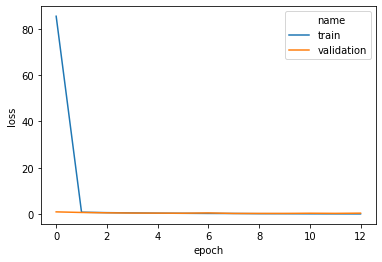

In [24]:
loss_plot = visualize.learning_curves("loss", metrics_df)

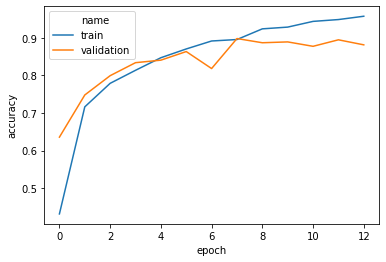

In [25]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)